recap [Intro]:
types of Classification Algo:
-Logistic Regression
-Naive Bayes Classification
-Decision Trees
-Random Forest
-Support Vector Machine (SVM)
-Stochastic Gradient Descent Classifier
-K-Nearest Neighbours (KNN)
-Neural Network (Deep Learning)
    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# MNIST

## Getting Data 

In [3]:
mnist = pd.read_csv('train.csv')
print(mnist.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
X=mnist.drop('label',axis=1)
y=mnist[['label']]
print(X.shape)
print(y.shape)

(42000, 784)
(42000, 1)


In [5]:
some_digits=X.iloc[22000]
some_digit_img= some_digits.values.reshape((28,28))

In [6]:
some_digit_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

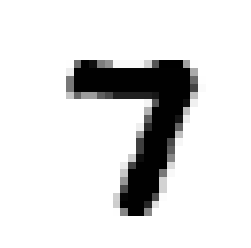

In [7]:
plt.imshow(some_digit_img,cmap=plt.cm.binary)
plt.axis("off")
plt.show()

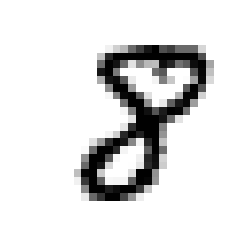

In [19]:
def plot_digit(data):
    image = data.values.reshape(28, 28)
    plt.imshow(image, cmap= plt.cm.binary)
    plt.axis("off")
    
plot_digit(X.iloc[2100])

### ways of  separating data in train and Test set

[option 1] writing your own logic of splitting the train and test dataset example,

def my_train_test_splitting_logic(data, test_ratio):
    shuffled_idx = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_idx = shuffled_idx[:test_set_size]
    train_idx = shuffled_idx[test_set_size:]

    return data.iloc[train_idx], data.iloc[test_idx]
train_set, test_set = my_train_test_splitting_logic(data, 0.2)
but this is not perfect: if run the above code-cell again, it will generate a diff train & test set! Over time you're ML algo will get to see the whole dataset, which is what we want to avoid.

One solution is after your first split, save them and load the saved data-file for subsequent model building & training.

Other option is you set a random number generator's seed before calling np.random.permutation()

np.random.seed(29)
shuffled_idx = np.random.permutation(len(data))
...
[option 2] use Scikit-Learn's train_test_split (pretty much the same logic laid down by sklearn with random seed like features.
example,

from sklearn.model_selection import trin_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=29)
[option 3] use Scikit-Learn's StratifiedShuffleSplit which keep the dataset startified even after sampling (bascially sampling the original dataset into some no. of sub-datasets but maintaining the same proportion of each of the classes in the sub-datasets as it was in the original dataset).
example,

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1. test_size=0.2, random_state=42)
for train_ix, test_ix in split.split(data, data["y_label"]):
    strat_train_set = data.loc[train_ix]
    strat_test_set = data.loc[test_ix]

In [20]:
train_set = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [21]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(mnist,test_size=0.2,random_state=29)

In [22]:
X_train, y_train=train_set.drop('label',axis=1),train_set[['label']]
X_test,y_test=train_set.drop('label',axis=1),train_set[['label']]
X_test=test.copy()

# Binary Classifier

In [23]:
#Classified into whether its a didhit 2 or digit thats not a 2

y_train_2=(y_train==2) # true for all 2s
y_test_2 =(y_test==2)

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=25)
sgd_clf.fit(X_train,y_train_2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=25, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
sgd_clf.predict([some_digits])

array([False])

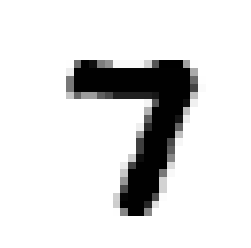

In [29]:
plot_digit(some_digits)

## Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_2, scoring="accuracy", cv=3)

array([0.97008929, 0.97348214, 0.97196429])

In [31]:
Is a good accuracy score (even after k-fold cross validation) enough to say that our classifier is performing good?

Object `good` not found.


Is a good accuracy score (even after k-fold cross validation) enough to say that our classifier is performing good

In [32]:
# lets see,
# lets build a Dumb Classifier, that learns nothing & detects everything as 'not a 2 digit' class

from sklearn.base import BaseEstimator

class Never2Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass # no training, learns nothing
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool) # return False (i.e. 0) for 'not a 2 digit' class

In [33]:
never_2_clf = Never2Classifier()
cross_val_score(never_2_clf, X_train, y_train_2, cv=3, scoring="accuracy")

array([0.90053571, 0.90142857, 0.89991071])

now as 9 classes out of 10 classes (0,1,2,3,....9) are 'not a 2 digit' class and only one class is actually a '2 digit' class,
even this dumb classifier shows nearly 90% accuracy

therefore, accuracy can't be used as performance measure for any classifier

Confusion Matrix

             
                 Predicted (No)      | Predicted (Yes)
               --|---------------------|--------------------|--
     Actual (No) | True Negative       |  False Positive    |
    Actual (Yes) | False Negative      |  True Positive     |

In [34]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3)

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_2, y_train_pred)

array([[30003,   258],
       [  688,  2651]], dtype=int64)

**Precision**
$$Precision= \frac{TP}{TP+FP}$$

In [37]:
from sklearn.metrics import precision_score

precision_score(y_train_2, y_train_pred)

0.9113097284290134

an ideal classifier would have high precision & high recall

F1 score
harmonic mean of Precision & Recall

$$F1= 2X\frac{precisionXrecall}{precision+recall}$$
$$F1=\frac{TP}{TP+\frac{FN+FP}{2}}$$

In [39]:
from sklearn.metrics import f1_score

f1_score(y_train_2, y_train_pred)

0.8485915492957746

## Precision-Recall Tradeoff
[basic story] everytime you try achieving more precision, you lose some bit of recall and vice versa

In [40]:
# lets plot precision recall tradeoff

y_scores = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve

#grab precision, recall and threshold
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)


**[Approach 1]**: selecting the best threshold to have the max precision at much greater recall

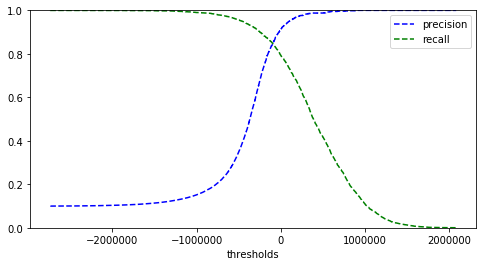

In [41]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.figure(figsize=(8,4))
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.legend(loc="best")
    plt.xlabel("thresholds")
    plt.ylim([0,1])

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

**[Approach 2]**: by plotting Precision against Recall



In [42]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-")
    plt.xlabel("recall", fontsize=14)
    plt.ylabel("precision", fontsize=14)
    plt.axis([0, 1, 0, 1])

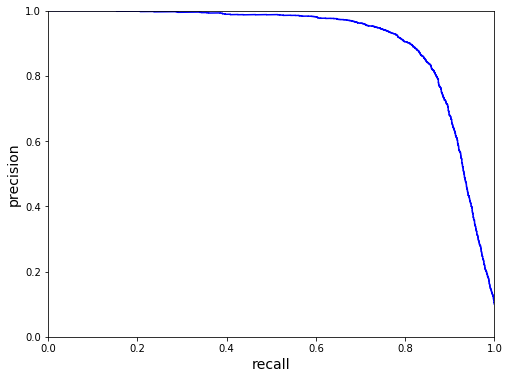

In [43]:
plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

ideal classifier would have PR curve much closer to the top right corner

**[Approach 3]** ROC (Receiver Operating Characteristics) Curve

similar to PR curve but ROC is plotted b/w TPR (recall) and FPR (ratio of negative instances that were classified as positive)

$$FPR=1−TNR$$
 
(true negative rate: ratio of negative instances that were correctly classfied as negative instances)

sensitivity = 1 - Specificity

In [44]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_2, y_scores)

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

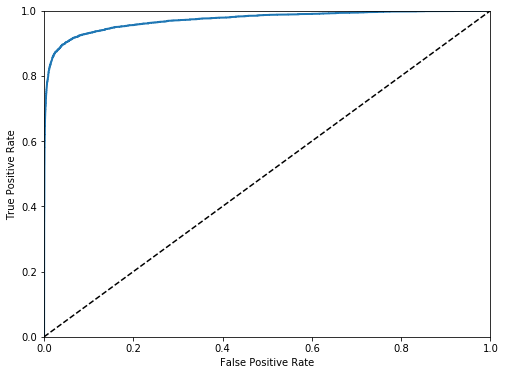

In [46]:
plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr, label="SGD")
plt.show()

center dotted line represents a purely random prediction making classifier.

ideal classifier would have ROC curve as close as possible to the top left corner

In [47]:
# trying Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=29)

y_proba_rf = cross_val_predict(rf_clf, X_train, y_train_2, cv=3, method="predict_proba")

In [48]:
# but to plot ROC curve, we need scores and not probabilities
# a simple solution would be that we just use the same probability as scores


y_score_rf = y_proba_rf[:, 1] # i.e. score = probability of all positive classes

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_2, y_score_rf)

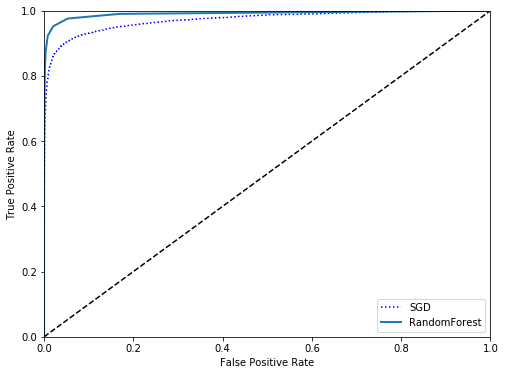

In [49]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_rf, tpr_rf, label="RandomForest")
plt.legend(loc="lower right")
plt.show()

**[Approach 4]** calculate your model's ROC Area Under Curver (AUC)

ideal classifier would have AUC equal to 1

In [50]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_2, y_scores)

0.9720812677336207

Multiclass Classifier
basic diff. is - binary classifier works 2 classes where your multiclass works for predicting multiple classes

Some algos like Random Forest, Naive Bayes, etc are very well capable of handling multiple classes. But there are also some algos like SVM and linear alogirthms that are strictly binary in nature.

So we use 2 kinds of approaches to train these binary fashioned algos to predict multilple classes:
one-versus-one (OvO) and one-versus-all (OvA) approach.

if there are N classes in OvA approach, you would train N binary classifiers
if there are N classes in OvO approach, you would train
$$\frac{NX(N−1)}{2}$$
 
binary classifiers

In [51]:
# lets SGD classifier for multiclass classification

sgd_clf.fit(X_train, y_train) # NOTE: not y_train_2 but whole target label

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=25, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
sgd_clf.predict([some_digits])

array([7], dtype=int64)

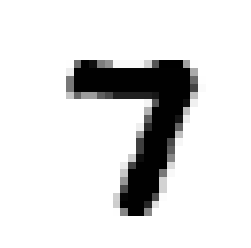

In [55]:
# verfiying
plot_digit(some_digits)

In [56]:
some_digit_scores = sgd_clf.decision_function([some_digits])
some_digit_scores

array([[-1460320.33182622, -1632916.08026786,  -828297.60972078,
         -529711.46205589, -1578783.14897298,  -512625.03230811,
        -1983658.92557001,   747402.88912087,  -448472.19118123,
         -683479.80122375]])

In [57]:
np.argmax(some_digit_scores)

7

In [58]:
# to view existing classes in your multiclass problem
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [59]:
sgd_clf.classes_[9]

9

## BONUS
[by default in Scikit-Learn] everything is in OvA fashion except fot SVM which is in OvO.

if you ever want to force Scikit-Learn to use only OvO for SGD (this is just for example)

In [65]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=29))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digits])

array([7], dtype=int64)

In [66]:
len(ovo_clf.estimators_)

45

## Multilabel Classifier
for example, lets say your multilabel classifier is supposed to predict whether its a digit greater than 6 and whether its an even number

In [67]:
y_train_gt_6 = (y_train > 6) # no. greater than 6
y_train_even = (y_train % 2 == 0) # even number
y_multilable = np.c_[y_train_gt_6, y_train_even] # np.c_ for concatenation of numpy slices

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilable)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [72]:
# now to make the predictions

knn_clf.predict([some_digits])

array([[ True, False]])

## Multioutput Classification
basically multilabel alssification wherein every label can again be a multiclass

## First Submission in Kaggle
`

In [73]:
rf_clf = RandomForestClassifier(random_state=29)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=29, verbose=0, warm_start=False)

In [74]:
y_test_pred = rf_clf.predict(X_test)

In [75]:
y_test_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [76]:
result = pd.DataFrame(y_test_pred).reset_index()
result.head()

,index,0
0,0,2
1,1,0
2,2,9
3,3,7
4,4,3


In [77]:
result.columns = ['ImageId', 'Label']
result.head(2)

,ImageId,Label
0,0,2
1,1,0


In [78]:
result['ImageId'] = result['ImageId'].apply(lambda x: x+1) # just increment row ids by 1
result.head(2)

,ImageId,Label
0,1,2
1,2,0


In [79]:
result.to_csv("submission.csv", index=False)